In [719]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

In [720]:
df = pd.read_csv('employee_training_performance_dirty.csv')

In [721]:
df

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,1,Sales,35,Female,NaN,60,good,100218,none,35,Yes,8,1,3,High,No,3,unknown,2023-05-12 00:00:00,20000
1,2,IT,NaN,Male,1,10,good,99684,0,NaN,No,3,1,4,Low,No,3,NaN,NaN,50000
2,3,IT,54,Female,1,10,80,41695,none,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
3,4,IT,NaN,Female,ten,60,90,54545,none,45,No,10,bad,3,High,NaN,happy,2020-09-23 00:00:00,2023-05-01 00:00:00,NaN
4,5,HR,25,Male,10,5,NaN,31734,0,long,No,10,5,NaN,Low,NaN,1,2019-11-10 00:00:00,2023-04-28 00:00:00,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Sales,unknown,Male,3,60,good,28621,10000,40,No,NaN,3,many,Low,Yes,3,2020-11-22 00:00:00,2023-01-22 00:00:00,high
99996,99997,HR,22,Male,1,many,excellent,32741,none,NaN,Yes,big,2,2,Low,Yes,1,2018-07-15 00:00:00,2023-07-30 00:00:00,NaN
99997,99998,IT,33,Female,10,20,excellent,NaN,none,45,Yes,3,5,1,NaN,Yes,2,2017-08-12 00:00:00,2023-07-02 00:00:00,high
99998,99999,IT,NaN,Male,NaN,60,excellent,97590,0,45,No,big,bad,3,High,No,4,2022-03-21 00:00:00,2023-07-30 00:00:00,high


In [722]:
df.isnull().sum()

employee_id             12024
department              11905
age                     12061
gender                  11940
experience_years        12076
training_hours          11913
performance_score       11982
salary                  12008
bonus                   11960
work_hours_weekly       11922
promotion_received      11988
team_size               12047
manager_rating          11948
project_count           11990
attrition_risk          11986
remote_work             12092
satisfaction_level      11986
joining_date            11991
last_review_date        12090
revenue_contribution    12024
dtype: int64

# Data Cleaning

In [723]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,1,Sales,35,Female,NaN,60,good,100218,none,35,Yes,8,1,3,High,No,3,unknown,2023-05-12 00:00:00,20000
1,2,IT,NaN,Male,1,10,good,99684,0,NaN,No,3,1,4,Low,No,3,NaN,NaN,50000
2,3,IT,54,Female,1,10,80,41695,none,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
3,4,IT,NaN,Female,ten,60,90,54545,none,45,No,10,bad,3,High,NaN,happy,2020-09-23 00:00:00,2023-05-01 00:00:00,NaN
4,5,HR,25,Male,10,5,NaN,31734,0,long,No,10,5,NaN,Low,NaN,1,2019-11-10 00:00:00,2023-04-28 00:00:00,10000


In [724]:
df['employee_id'] = "EMP " + df['employee_id']

In [725]:
df = df.dropna(subset=['employee_id'])

In [726]:
df['employee_id'].reset_index()

,index,employee_id
0,0,EMP 1
1,1,EMP 2
2,2,EMP 3
3,3,EMP 4
4,4,EMP 5
...,...,...
87971,99994,EMP 99995
87972,99995,EMP 99996
87973,99996,EMP 99997
87974,99997,EMP 99998


In [727]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,EMP 1,Sales,35,Female,NaN,60,good,100218,none,35,Yes,8,1,3,High,No,3,unknown,2023-05-12 00:00:00,20000
1,EMP 2,IT,NaN,Male,1,10,good,99684,0,NaN,No,3,1,4,Low,No,3,NaN,NaN,50000
2,EMP 3,IT,54,Female,1,10,80,41695,none,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
3,EMP 4,IT,NaN,Female,ten,60,90,54545,none,45,No,10,bad,3,High,NaN,happy,2020-09-23 00:00:00,2023-05-01 00:00:00,NaN
4,EMP 5,HR,25,Male,10,5,NaN,31734,0,long,No,10,5,NaN,Low,NaN,1,2019-11-10 00:00:00,2023-04-28 00:00:00,10000


In [728]:
df.isnull().sum()

employee_id                 0
department              10406
age                     10626
gender                  10588
experience_years        10588
training_hours          10474
performance_score       10530
salary                  10544
bonus                   10534
work_hours_weekly       10503
promotion_received      10501
team_size               10645
manager_rating          10552
project_count           10616
attrition_risk          10548
remote_work             10657
satisfaction_level      10530
joining_date            10592
last_review_date        10627
revenue_contribution    10558
dtype: int64

In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87976 entries, 0 to 99998
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   employee_id           87976 non-null  object
 1   department            77570 non-null  object
 2   age                   77350 non-null  object
 3   gender                77388 non-null  object
 4   experience_years      77388 non-null  object
 5   training_hours        77502 non-null  object
 6   performance_score     77446 non-null  object
 7   salary                77432 non-null  object
 8   bonus                 77442 non-null  object
 9   work_hours_weekly     77473 non-null  object
 10  promotion_received    77475 non-null  object
 11  team_size             77331 non-null  object
 12  manager_rating        77424 non-null  object
 13  project_count         77360 non-null  object
 14  attrition_risk        77428 non-null  object
 15  remote_work           77319 non-null  obj

In [730]:
df['department'].unique()

array(['Sales', 'IT', 'HR', 'Operations', nan, 'unknown'], dtype=object)

In [731]:
df = df.dropna(subset=['department'])

In [732]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,EMP 1,Sales,35,Female,NaN,60,good,100218,none,35,Yes,8,1,3,High,No,3,unknown,2023-05-12 00:00:00,20000
1,EMP 2,IT,NaN,Male,1,10,good,99684,0,NaN,No,3,1,4,Low,No,3,NaN,NaN,50000
2,EMP 3,IT,54,Female,1,10,80,41695,none,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
3,EMP 4,IT,NaN,Female,ten,60,90,54545,none,45,No,10,bad,3,High,NaN,happy,2020-09-23 00:00:00,2023-05-01 00:00:00,NaN
4,EMP 5,HR,25,Male,10,5,NaN,31734,0,long,No,10,5,NaN,Low,NaN,1,2019-11-10 00:00:00,2023-04-28 00:00:00,10000


In [733]:
df['department'] = df['department'].fillna('UNKNOW')

In [734]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,EMP 1,Sales,35,Female,NaN,60,good,100218,none,35,Yes,8,1,3,High,No,3,unknown,2023-05-12 00:00:00,20000
1,EMP 2,IT,NaN,Male,1,10,good,99684,0,NaN,No,3,1,4,Low,No,3,NaN,NaN,50000
2,EMP 3,IT,54,Female,1,10,80,41695,none,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
3,EMP 4,IT,NaN,Female,ten,60,90,54545,none,45,No,10,bad,3,High,NaN,happy,2020-09-23 00:00:00,2023-05-01 00:00:00,NaN
4,EMP 5,HR,25,Male,10,5,NaN,31734,0,long,No,10,5,NaN,Low,NaN,1,2019-11-10 00:00:00,2023-04-28 00:00:00,10000


In [735]:
df['department'].unique()

array(['Sales', 'IT', 'HR', 'Operations', 'unknown'], dtype=object)

In [736]:
df

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,EMP 1,Sales,35,Female,NaN,60,good,100218,none,35,Yes,8,1,3,High,No,3,unknown,2023-05-12 00:00:00,20000
1,EMP 2,IT,NaN,Male,1,10,good,99684,0,NaN,No,3,1,4,Low,No,3,NaN,NaN,50000
2,EMP 3,IT,54,Female,1,10,80,41695,none,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
3,EMP 4,IT,NaN,Female,ten,60,90,54545,none,45,No,10,bad,3,High,NaN,happy,2020-09-23 00:00:00,2023-05-01 00:00:00,NaN
4,EMP 5,HR,25,Male,10,5,NaN,31734,0,long,No,10,5,NaN,Low,NaN,1,2019-11-10 00:00:00,2023-04-28 00:00:00,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,EMP 99995,Sales,48,Male,1,60,50,86370,none,45,NaN,big,NaN,1,Medium,No,happy,2022-01-23 00:00:00,2023-01-16 00:00:00,high
99995,EMP 99996,Sales,unknown,Male,3,60,good,28621,10000,40,No,NaN,3,many,Low,Yes,3,2020-11-22 00:00:00,2023-01-22 00:00:00,high
99996,EMP 99997,HR,22,Male,1,many,excellent,32741,none,NaN,Yes,big,2,2,Low,Yes,1,2018-07-15 00:00:00,2023-07-30 00:00:00,NaN
99997,EMP 99998,IT,33,Female,10,20,excellent,NaN,none,45,Yes,3,5,1,NaN,Yes,2,2017-08-12 00:00:00,2023-07-02 00:00:00,high


In [737]:
df['age'] = df['age'].replace('unknown',pd.NA)

In [738]:
df

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,EMP 1,Sales,35,Female,NaN,60,good,100218,none,35,Yes,8,1,3,High,No,3,unknown,2023-05-12 00:00:00,20000
1,EMP 2,IT,NaN,Male,1,10,good,99684,0,NaN,No,3,1,4,Low,No,3,NaN,NaN,50000
2,EMP 3,IT,54,Female,1,10,80,41695,none,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
3,EMP 4,IT,NaN,Female,ten,60,90,54545,none,45,No,10,bad,3,High,NaN,happy,2020-09-23 00:00:00,2023-05-01 00:00:00,NaN
4,EMP 5,HR,25,Male,10,5,NaN,31734,0,long,No,10,5,NaN,Low,NaN,1,2019-11-10 00:00:00,2023-04-28 00:00:00,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,EMP 99995,Sales,48,Male,1,60,50,86370,none,45,NaN,big,NaN,1,Medium,No,happy,2022-01-23 00:00:00,2023-01-16 00:00:00,high
99995,EMP 99996,Sales,<NA>,Male,3,60,good,28621,10000,40,No,NaN,3,many,Low,Yes,3,2020-11-22 00:00:00,2023-01-22 00:00:00,high
99996,EMP 99997,HR,22,Male,1,many,excellent,32741,none,NaN,Yes,big,2,2,Low,Yes,1,2018-07-15 00:00:00,2023-07-30 00:00:00,NaN
99997,EMP 99998,IT,33,Female,10,20,excellent,NaN,none,45,Yes,3,5,1,NaN,Yes,2,2017-08-12 00:00:00,2023-07-02 00:00:00,high


In [739]:
df = df.dropna(subset=['age'])

In [740]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,EMP 1,Sales,35,Female,NaN,60,good,100218,none,35,Yes,8,1,3,High,No,3,unknown,2023-05-12 00:00:00,20000
2,EMP 3,IT,54,Female,1,10,80,41695,none,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
4,EMP 5,HR,25,Male,10,5,NaN,31734,0,long,No,10,5,NaN,Low,NaN,1,2019-11-10 00:00:00,2023-04-28 00:00:00,10000
5,EMP 6,HR,50,Male,NaN,many,good,113416,NaN,long,Yes,NaN,1,4,Medium,No,3,2022-03-06 00:00:00,2023-02-09 00:00:00,20000
8,EMP 9,Sales,31,Male,NaN,many,good,27341,10000,50,NaN,3,4,NaN,High,Yes,NaN,2022-02-02 00:00:00,2023-06-05 00:00:00,50000


In [741]:
df['age'] =  df['age'].astype(int)

C:\Users\md salman\AppData\Local\Temp\ipykernel_17972\3843985129.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [742]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,EMP 1,Sales,35,Female,NaN,60,good,100218,none,35,Yes,8,1,3,High,No,3,unknown,2023-05-12 00:00:00,20000
2,EMP 3,IT,54,Female,1,10,80,41695,none,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
4,EMP 5,HR,25,Male,10,5,NaN,31734,0,long,No,10,5,NaN,Low,NaN,1,2019-11-10 00:00:00,2023-04-28 00:00:00,10000
5,EMP 6,HR,50,Male,NaN,many,good,113416,NaN,long,Yes,NaN,1,4,Medium,No,3,2022-03-06 00:00:00,2023-02-09 00:00:00,20000
8,EMP 9,Sales,31,Male,NaN,many,good,27341,10000,50,NaN,3,4,NaN,High,Yes,NaN,2022-02-02 00:00:00,2023-06-05 00:00:00,50000


In [743]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65936 entries, 0 to 99997
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   employee_id           65936 non-null  object
 1   department            65936 non-null  object
 2   age                   65936 non-null  int64 
 3   gender                57963 non-null  object
 4   experience_years      58046 non-null  object
 5   training_hours        58100 non-null  object
 6   performance_score     58016 non-null  object
 7   salary                57981 non-null  object
 8   bonus                 58005 non-null  object
 9   work_hours_weekly     58039 non-null  object
 10  promotion_received    58012 non-null  object
 11  team_size             57981 non-null  object
 12  manager_rating        57984 non-null  object
 13  project_count         57922 non-null  object
 14  attrition_risk        58013 non-null  object
 15  remote_work           57911 non-null  obj

In [744]:
df['gender'].unique()

array(['Female', 'Male', nan, 'unknown'], dtype=object)

In [745]:
df = df.dropna(subset=['gender'])

In [746]:
df['gender'] = df['gender'].fillna('unknown')

In [747]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,EMP 1,Sales,35,Female,NaN,60,good,100218,none,35,Yes,8,1,3,High,No,3,unknown,2023-05-12 00:00:00,20000
2,EMP 3,IT,54,Female,1,10,80,41695,none,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
4,EMP 5,HR,25,Male,10,5,NaN,31734,0,long,No,10,5,NaN,Low,NaN,1,2019-11-10 00:00:00,2023-04-28 00:00:00,10000
5,EMP 6,HR,50,Male,NaN,many,good,113416,NaN,long,Yes,NaN,1,4,Medium,No,3,2022-03-06 00:00:00,2023-02-09 00:00:00,20000
8,EMP 9,Sales,31,Male,NaN,many,good,27341,10000,50,NaN,3,4,NaN,High,Yes,NaN,2022-02-02 00:00:00,2023-06-05 00:00:00,50000


In [748]:
df['gender'].unique()

array(['Female', 'Male', 'unknown'], dtype=object)

In [749]:
df['experience_years'].unique()

array([nan, '1', '10', '3', 'ten', '5', 'five', '7', 'unknown'],
      dtype=object)

In [750]:
df['experience_years']  = df['experience_years'].str.replace('ten','10')
df['experience_years']  = df['experience_years'].str.replace('five','5')

In [751]:
df = df.dropna(subset=['experience_years'])

In [752]:
df['experience_years'] = df['experience_years'].fillna('unknown')

In [753]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1,10,80,41695,none,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
4,EMP 5,HR,25,Male,10,5,NaN,31734,0,long,No,10,5,NaN,Low,NaN,1,2019-11-10 00:00:00,2023-04-28 00:00:00,10000
9,EMP 10,Sales,57,Female,1,60,NaN,NaN,0,long,Yes,10,4,4,High,No,2,2019-08-19 00:00:00,unknown,NaN
10,EMP 11,Sales,52,Male,3,many,80,34575,0,40,No,unknown,bad,3,Low,Yes,2,2020-12-25 00:00:00,2023-10-11 00:00:00,10000
12,EMP 13,Operations,20,Male,10,5,NaN,63488,NaN,50,No,big,1,NaN,Low,No,2,2021-01-30 00:00:00,NaN,50000


In [754]:
df['experience_years'].unique()

array(['1', '10', '3', '5', '7', 'unknown'], dtype=object)

In [755]:
df['training_hours'].unique()

array(['10', '5', '60', 'many', '20', nan, '40', 'unknown'], dtype=object)

In [756]:
df['training_hours']  = df['training_hours'].str.replace('many','10')

In [757]:
df['training_hours'] = df['training_hours'].replace('unknown',pd.NA)

In [758]:
df = df.dropna(subset=['training_hours'])

In [759]:
df['training_hours'] = df['training_hours'].astype(float)

In [760]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1,10.0,80,41695,none,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
4,EMP 5,HR,25,Male,10,5.0,NaN,31734,0,long,No,10,5,NaN,Low,NaN,1,2019-11-10 00:00:00,2023-04-28 00:00:00,10000
9,EMP 10,Sales,57,Female,1,60.0,NaN,NaN,0,long,Yes,10,4,4,High,No,2,2019-08-19 00:00:00,unknown,NaN
10,EMP 11,Sales,52,Male,3,10.0,80,34575,0,40,No,unknown,bad,3,Low,Yes,2,2020-12-25 00:00:00,2023-10-11 00:00:00,10000
12,EMP 13,Operations,20,Male,10,5.0,NaN,63488,NaN,50,No,big,1,NaN,Low,No,2,2021-01-30 00:00:00,NaN,50000


In [761]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43398 entries, 2 to 99997
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           43398 non-null  object 
 1   department            43398 non-null  object 
 2   age                   43398 non-null  int64  
 3   gender                43398 non-null  object 
 4   experience_years      43398 non-null  object 
 5   training_hours        43398 non-null  float64
 6   performance_score     38167 non-null  object 
 7   salary                38168 non-null  object 
 8   bonus                 38187 non-null  object 
 9   work_hours_weekly     38265 non-null  object 
 10  promotion_received    38199 non-null  object 
 11  team_size             38084 non-null  object 
 12  manager_rating        38160 non-null  object 
 13  project_count         38117 non-null  object 
 14  attrition_risk        38175 non-null  object 
 15  remote_work           38

In [762]:
df['experience_years'].unique()

array(['1', '10', '3', '5', '7', 'unknown'], dtype=object)

In [763]:
df['experience_years'] = df['experience_years'].replace('unknown',pd.NA)

In [764]:
df = df.dropna(subset=['experience_years'])

In [765]:
df['experience_years'] = df['experience_years'].astype(float)

In [766]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80,41695,none,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
4,EMP 5,HR,25,Male,10.0,5.0,NaN,31734,0,long,No,10,5,NaN,Low,NaN,1,2019-11-10 00:00:00,2023-04-28 00:00:00,10000
9,EMP 10,Sales,57,Female,1.0,60.0,NaN,NaN,0,long,Yes,10,4,4,High,No,2,2019-08-19 00:00:00,unknown,NaN
10,EMP 11,Sales,52,Male,3.0,10.0,80,34575,0,40,No,unknown,bad,3,Low,Yes,2,2020-12-25 00:00:00,2023-10-11 00:00:00,10000
12,EMP 13,Operations,20,Male,10.0,5.0,NaN,63488,NaN,50,No,big,1,NaN,Low,No,2,2021-01-30 00:00:00,NaN,50000


In [767]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80,41695,none,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
4,EMP 5,HR,25,Male,10.0,5.0,NaN,31734,0,long,No,10,5,NaN,Low,NaN,1,2019-11-10 00:00:00,2023-04-28 00:00:00,10000
9,EMP 10,Sales,57,Female,1.0,60.0,NaN,NaN,0,long,Yes,10,4,4,High,No,2,2019-08-19 00:00:00,unknown,NaN
10,EMP 11,Sales,52,Male,3.0,10.0,80,34575,0,40,No,unknown,bad,3,Low,Yes,2,2020-12-25 00:00:00,2023-10-11 00:00:00,10000
12,EMP 13,Operations,20,Male,10.0,5.0,NaN,63488,NaN,50,No,big,1,NaN,Low,No,2,2021-01-30 00:00:00,NaN,50000


In [768]:
df['performance_score'].unique()

array(['80', nan, '70', '90', 'excellent', '60', 'good', 'unknown', '50'],
      dtype=object)

In [769]:
df['performance_score'] = df['performance_score'].replace('excellent','80')

In [770]:
df['performance_score'] = df['performance_score'].replace('good','60')

In [771]:
df['performance_score'] = df['performance_score'].replace('unknown',pd.NA)

In [772]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80,41695,none,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
4,EMP 5,HR,25,Male,10.0,5.0,NaN,31734,0,long,No,10,5,NaN,Low,NaN,1,2019-11-10 00:00:00,2023-04-28 00:00:00,10000
9,EMP 10,Sales,57,Female,1.0,60.0,NaN,NaN,0,long,Yes,10,4,4,High,No,2,2019-08-19 00:00:00,unknown,NaN
10,EMP 11,Sales,52,Male,3.0,10.0,80,34575,0,40,No,unknown,bad,3,Low,Yes,2,2020-12-25 00:00:00,2023-10-11 00:00:00,10000
12,EMP 13,Operations,20,Male,10.0,5.0,NaN,63488,NaN,50,No,big,1,NaN,Low,No,2,2021-01-30 00:00:00,NaN,50000


In [773]:
df = df.dropna(subset=['performance_score'])

In [774]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80,41695,none,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
10,EMP 11,Sales,52,Male,3.0,10.0,80,34575,0,40,No,unknown,bad,3,Low,Yes,2,2020-12-25 00:00:00,2023-10-11 00:00:00,10000
14,EMP 15,HR,30,Female,3.0,20.0,80,NaN,5000,45,No,10,5,many,High,Yes,3,2016-06-04 00:00:00,2023-05-10 00:00:00,20000
24,EMP 25,IT,21,Female,10.0,5.0,70,64973,0,NaN,unknown,NaN,2,NaN,High,Yes,5,2018-10-30 00:00:00,2023-09-05 00:00:00,20000
25,EMP 26,HR,57,Male,10.0,60.0,90,83066,none,35,NaN,10,2,1,Low,Yes,2,2019-09-30 00:00:00,2023-05-22 00:00:00,high


In [775]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35718 entries, 2 to 99997
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           35718 non-null  object 
 1   department            35718 non-null  object 
 2   age                   35718 non-null  int64  
 3   gender                35718 non-null  object 
 4   experience_years      35718 non-null  float64
 5   training_hours        35718 non-null  float64
 6   performance_score     35718 non-null  object 
 7   salary                31452 non-null  object 
 8   bonus                 31396 non-null  object 
 9   work_hours_weekly     31480 non-null  object 
 10  promotion_received    31465 non-null  object 
 11  team_size             31350 non-null  object 
 12  manager_rating        31411 non-null  object 
 13  project_count         31404 non-null  object 
 14  attrition_risk        31396 non-null  object 
 15  remote_work           31

In [776]:
df['performance_score'] = df['performance_score'].astype(float)

In [777]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695,none,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
10,EMP 11,Sales,52,Male,3.0,10.0,80.0,34575,0,40,No,unknown,bad,3,Low,Yes,2,2020-12-25 00:00:00,2023-10-11 00:00:00,10000
14,EMP 15,HR,30,Female,3.0,20.0,80.0,NaN,5000,45,No,10,5,many,High,Yes,3,2016-06-04 00:00:00,2023-05-10 00:00:00,20000
24,EMP 25,IT,21,Female,10.0,5.0,70.0,64973,0,NaN,unknown,NaN,2,NaN,High,Yes,5,2018-10-30 00:00:00,2023-09-05 00:00:00,20000
25,EMP 26,HR,57,Male,10.0,60.0,90.0,83066,none,35,NaN,10,2,1,Low,Yes,2,2019-09-30 00:00:00,2023-05-22 00:00:00,high


In [778]:
df['salary'].unique()

array(['41695', '34575', nan, ..., '53744', '86370', '32741'],
      shape=(26223,), dtype=object)

In [779]:
df['salary'] = pd.to_numeric(df['salary'],errors='coerce')

In [780]:
df = df.dropna(subset=['salary'])

In [781]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,none,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
10,EMP 11,Sales,52,Male,3.0,10.0,80.0,34575.0,0,40,No,unknown,bad,3,Low,Yes,2,2020-12-25 00:00:00,2023-10-11 00:00:00,10000
24,EMP 25,IT,21,Female,10.0,5.0,70.0,64973.0,0,NaN,unknown,NaN,2,NaN,High,Yes,5,2018-10-30 00:00:00,2023-09-05 00:00:00,20000
25,EMP 26,HR,57,Male,10.0,60.0,90.0,83066.0,none,35,NaN,10,2,1,Low,Yes,2,2019-09-30 00:00:00,2023-05-22 00:00:00,high
27,EMP 28,Operations,21,Female,10.0,10.0,70.0,67126.0,5000,50,Yes,big,2,4,Low,Yes,NaN,2023-02-17 00:00:00,2023-05-09 00:00:00,20000


In [782]:
df['bonus']

2         none
10           0
24           0
25        none
27        5000
         ...  
99982    10000
99992    10000
99993     5000
99994     none
99996     none
Name: bonus, Length: 30392, dtype: object

In [783]:
df['bonus'] = df['bonus'].replace('none','0')

In [784]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
10,EMP 11,Sales,52,Male,3.0,10.0,80.0,34575.0,0,40,No,unknown,bad,3,Low,Yes,2,2020-12-25 00:00:00,2023-10-11 00:00:00,10000
24,EMP 25,IT,21,Female,10.0,5.0,70.0,64973.0,0,NaN,unknown,NaN,2,NaN,High,Yes,5,2018-10-30 00:00:00,2023-09-05 00:00:00,20000
25,EMP 26,HR,57,Male,10.0,60.0,90.0,83066.0,0,35,NaN,10,2,1,Low,Yes,2,2019-09-30 00:00:00,2023-05-22 00:00:00,high
27,EMP 28,Operations,21,Female,10.0,10.0,70.0,67126.0,5000,50,Yes,big,2,4,Low,Yes,NaN,2023-02-17 00:00:00,2023-05-09 00:00:00,20000


In [785]:
df['bonus'] = pd.to_numeric(df['bonus'],errors='coerce')

In [786]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
10,EMP 11,Sales,52,Male,3.0,10.0,80.0,34575.0,0.0,40,No,unknown,bad,3,Low,Yes,2,2020-12-25 00:00:00,2023-10-11 00:00:00,10000
24,EMP 25,IT,21,Female,10.0,5.0,70.0,64973.0,0.0,NaN,unknown,NaN,2,NaN,High,Yes,5,2018-10-30 00:00:00,2023-09-05 00:00:00,20000
25,EMP 26,HR,57,Male,10.0,60.0,90.0,83066.0,0.0,35,NaN,10,2,1,Low,Yes,2,2019-09-30 00:00:00,2023-05-22 00:00:00,high
27,EMP 28,Operations,21,Female,10.0,10.0,70.0,67126.0,5000.0,50,Yes,big,2,4,Low,Yes,NaN,2023-02-17 00:00:00,2023-05-09 00:00:00,20000


In [787]:
df = df.dropna(subset=['bonus'])

In [788]:
df['bonus'] = df['bonus'].fillna('0')

In [789]:
df['work_hours_weekly'].unique()

array(['40', nan, '35', '50', 'long', '45', 'unknown'], dtype=object)

In [790]:
df['work_hours_weekly'] = df['work_hours_weekly'].replace('long','50')

In [791]:
df['work_hours_weekly'] = df['work_hours_weekly'].replace('unknown',pd.NA)

In [792]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
10,EMP 11,Sales,52,Male,3.0,10.0,80.0,34575.0,0.0,40,No,unknown,bad,3,Low,Yes,2,2020-12-25 00:00:00,2023-10-11 00:00:00,10000
24,EMP 25,IT,21,Female,10.0,5.0,70.0,64973.0,0.0,NaN,unknown,NaN,2,NaN,High,Yes,5,2018-10-30 00:00:00,2023-09-05 00:00:00,20000
25,EMP 26,HR,57,Male,10.0,60.0,90.0,83066.0,0.0,35,NaN,10,2,1,Low,Yes,2,2019-09-30 00:00:00,2023-05-22 00:00:00,high
27,EMP 28,Operations,21,Female,10.0,10.0,70.0,67126.0,5000.0,50,Yes,big,2,4,Low,Yes,NaN,2023-02-17 00:00:00,2023-05-09 00:00:00,20000


In [793]:
df['work_hours_weekly'] = pd.to_numeric(df['work_hours_weekly'],errors='coerce')

In [794]:
df = df.dropna(subset='work_hours_weekly')

In [795]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
10,EMP 11,Sales,52,Male,3.0,10.0,80.0,34575.0,0.0,40.0,No,unknown,bad,3,Low,Yes,2,2020-12-25 00:00:00,2023-10-11 00:00:00,10000
25,EMP 26,HR,57,Male,10.0,60.0,90.0,83066.0,0.0,35.0,NaN,10,2,1,Low,Yes,2,2019-09-30 00:00:00,2023-05-22 00:00:00,high
27,EMP 28,Operations,21,Female,10.0,10.0,70.0,67126.0,5000.0,50.0,Yes,big,2,4,Low,Yes,NaN,2023-02-17 00:00:00,2023-05-09 00:00:00,20000
32,EMP 33,Sales,57,Male,1.0,5.0,90.0,22147.0,0.0,50.0,Yes,3,bad,4,Medium,No,2,2016-09-11 00:00:00,2023-06-24 00:00:00,NaN


In [796]:
df['promotion_received'].unique()

array(['Yes', 'No', nan, 'unknown'], dtype=object)

In [797]:
df = df.dropna(subset=['promotion_received'])

In [798]:
df['team_size'].unique()

array(['3', 'unknown', 'big', '5', '8', nan, '10'], dtype=object)

In [799]:
df['team_size']   = df['team_size'].replace('big','10')

In [800]:
df['team_size'] = df['team_size'].replace('unknown',pd.NA)

In [801]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
10,EMP 11,Sales,52,Male,3.0,10.0,80.0,34575.0,0.0,40.0,No,<NA>,bad,3,Low,Yes,2,2020-12-25 00:00:00,2023-10-11 00:00:00,10000
27,EMP 28,Operations,21,Female,10.0,10.0,70.0,67126.0,5000.0,50.0,Yes,10,2,4,Low,Yes,NaN,2023-02-17 00:00:00,2023-05-09 00:00:00,20000
32,EMP 33,Sales,57,Male,1.0,5.0,90.0,22147.0,0.0,50.0,Yes,3,bad,4,Medium,No,2,2016-09-11 00:00:00,2023-06-24 00:00:00,NaN
34,EMP 35,IT,50,Male,10.0,5.0,60.0,103836.0,0.0,50.0,No,5,4,1,NaN,Yes,5,unknown,2023-06-05 00:00:00,10000


In [802]:
df = df.dropna(subset=['team_size'])

In [803]:
df['team_size'] = df['team_size'].astype(float)

In [804]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
27,EMP 28,Operations,21,Female,10.0,10.0,70.0,67126.0,5000.0,50.0,Yes,10.0,2,4,Low,Yes,NaN,2023-02-17 00:00:00,2023-05-09 00:00:00,20000
32,EMP 33,Sales,57,Male,1.0,5.0,90.0,22147.0,0.0,50.0,Yes,3.0,bad,4,Medium,No,2,2016-09-11 00:00:00,2023-06-24 00:00:00,NaN
34,EMP 35,IT,50,Male,10.0,5.0,60.0,103836.0,0.0,50.0,No,5.0,4,1,NaN,Yes,5,unknown,2023-06-05 00:00:00,10000
39,EMP 40,HR,26,Female,5.0,10.0,60.0,47117.0,10000.0,50.0,Yes,5.0,bad,NaN,High,No,4,2021-10-10 00:00:00,2023-04-06 00:00:00,10000


In [805]:
df['manager_rating'].unique()

array(['3', '2', 'bad', '4', nan, '1', '5', 'unknown'], dtype=object)

In [806]:
df['manager_rating'] = df['manager_rating'].replace('bad','1')

In [807]:
df['manager_rating'] = df['manager_rating'].replace('unknown',pd.NA)

In [808]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
27,EMP 28,Operations,21,Female,10.0,10.0,70.0,67126.0,5000.0,50.0,Yes,10.0,2,4,Low,Yes,NaN,2023-02-17 00:00:00,2023-05-09 00:00:00,20000
32,EMP 33,Sales,57,Male,1.0,5.0,90.0,22147.0,0.0,50.0,Yes,3.0,1,4,Medium,No,2,2016-09-11 00:00:00,2023-06-24 00:00:00,NaN
34,EMP 35,IT,50,Male,10.0,5.0,60.0,103836.0,0.0,50.0,No,5.0,4,1,NaN,Yes,5,unknown,2023-06-05 00:00:00,10000
39,EMP 40,HR,26,Female,5.0,10.0,60.0,47117.0,10000.0,50.0,Yes,5.0,1,NaN,High,No,4,2021-10-10 00:00:00,2023-04-06 00:00:00,10000


In [809]:
df = df.dropna(subset=['manager_rating'])

In [810]:
df['manager_rating'] = df['manager_rating'].astype(float)

In [811]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
27,EMP 28,Operations,21,Female,10.0,10.0,70.0,67126.0,5000.0,50.0,Yes,10.0,2.0,4,Low,Yes,NaN,2023-02-17 00:00:00,2023-05-09 00:00:00,20000
32,EMP 33,Sales,57,Male,1.0,5.0,90.0,22147.0,0.0,50.0,Yes,3.0,1.0,4,Medium,No,2,2016-09-11 00:00:00,2023-06-24 00:00:00,NaN
34,EMP 35,IT,50,Male,10.0,5.0,60.0,103836.0,0.0,50.0,No,5.0,4.0,1,NaN,Yes,5,unknown,2023-06-05 00:00:00,10000
39,EMP 40,HR,26,Female,5.0,10.0,60.0,47117.0,10000.0,50.0,Yes,5.0,1.0,NaN,High,No,4,2021-10-10 00:00:00,2023-04-06 00:00:00,10000


In [812]:
df['project_count'].unique()

array(['4', '1', nan, '2', 'many', '3', 'unknown'], dtype=object)

In [813]:
df['project_count'] = df['project_count'].replace('many','3')

In [814]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
27,EMP 28,Operations,21,Female,10.0,10.0,70.0,67126.0,5000.0,50.0,Yes,10.0,2.0,4,Low,Yes,NaN,2023-02-17 00:00:00,2023-05-09 00:00:00,20000
32,EMP 33,Sales,57,Male,1.0,5.0,90.0,22147.0,0.0,50.0,Yes,3.0,1.0,4,Medium,No,2,2016-09-11 00:00:00,2023-06-24 00:00:00,NaN
34,EMP 35,IT,50,Male,10.0,5.0,60.0,103836.0,0.0,50.0,No,5.0,4.0,1,NaN,Yes,5,unknown,2023-06-05 00:00:00,10000
39,EMP 40,HR,26,Female,5.0,10.0,60.0,47117.0,10000.0,50.0,Yes,5.0,1.0,NaN,High,No,4,2021-10-10 00:00:00,2023-04-06 00:00:00,10000


In [815]:
df['project_count'] = df['project_count'].replace('unknown',pd.NA)

In [816]:
df = df.dropna(subset=['project_count'])

In [817]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
27,EMP 28,Operations,21,Female,10.0,10.0,70.0,67126.0,5000.0,50.0,Yes,10.0,2.0,4,Low,Yes,NaN,2023-02-17 00:00:00,2023-05-09 00:00:00,20000
32,EMP 33,Sales,57,Male,1.0,5.0,90.0,22147.0,0.0,50.0,Yes,3.0,1.0,4,Medium,No,2,2016-09-11 00:00:00,2023-06-24 00:00:00,NaN
34,EMP 35,IT,50,Male,10.0,5.0,60.0,103836.0,0.0,50.0,No,5.0,4.0,1,NaN,Yes,5,unknown,2023-06-05 00:00:00,10000
46,EMP 47,HR,51,Male,10.0,5.0,60.0,63762.0,10000.0,50.0,No,5.0,1.0,2,Low,No,4,2022-12-15 00:00:00,NaN,20000


In [818]:
df['project_count'] = df['project_count'].astype(float)

In [819]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
27,EMP 28,Operations,21,Female,10.0,10.0,70.0,67126.0,5000.0,50.0,Yes,10.0,2.0,4.0,Low,Yes,NaN,2023-02-17 00:00:00,2023-05-09 00:00:00,20000
32,EMP 33,Sales,57,Male,1.0,5.0,90.0,22147.0,0.0,50.0,Yes,3.0,1.0,4.0,Medium,No,2,2016-09-11 00:00:00,2023-06-24 00:00:00,NaN
34,EMP 35,IT,50,Male,10.0,5.0,60.0,103836.0,0.0,50.0,No,5.0,4.0,1.0,NaN,Yes,5,unknown,2023-06-05 00:00:00,10000
46,EMP 47,HR,51,Male,10.0,5.0,60.0,63762.0,10000.0,50.0,No,5.0,1.0,2.0,Low,No,4,2022-12-15 00:00:00,NaN,20000


In [820]:
df['attrition_risk'].unique()

array(['Low', 'Medium', nan, 'High', 'unknown'], dtype=object)

In [821]:
df['attrition_risk'] = df['attrition_risk'].replace('unknown',pd.NA)

In [822]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
27,EMP 28,Operations,21,Female,10.0,10.0,70.0,67126.0,5000.0,50.0,Yes,10.0,2.0,4.0,Low,Yes,NaN,2023-02-17 00:00:00,2023-05-09 00:00:00,20000
32,EMP 33,Sales,57,Male,1.0,5.0,90.0,22147.0,0.0,50.0,Yes,3.0,1.0,4.0,Medium,No,2,2016-09-11 00:00:00,2023-06-24 00:00:00,NaN
34,EMP 35,IT,50,Male,10.0,5.0,60.0,103836.0,0.0,50.0,No,5.0,4.0,1.0,NaN,Yes,5,unknown,2023-06-05 00:00:00,10000
46,EMP 47,HR,51,Male,10.0,5.0,60.0,63762.0,10000.0,50.0,No,5.0,1.0,2.0,Low,No,4,2022-12-15 00:00:00,NaN,20000


In [823]:
df = df.dropna(subset=['attrition_risk'])

In [824]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
27,EMP 28,Operations,21,Female,10.0,10.0,70.0,67126.0,5000.0,50.0,Yes,10.0,2.0,4.0,Low,Yes,NaN,2023-02-17 00:00:00,2023-05-09 00:00:00,20000
32,EMP 33,Sales,57,Male,1.0,5.0,90.0,22147.0,0.0,50.0,Yes,3.0,1.0,4.0,Medium,No,2,2016-09-11 00:00:00,2023-06-24 00:00:00,NaN
46,EMP 47,HR,51,Male,10.0,5.0,60.0,63762.0,10000.0,50.0,No,5.0,1.0,2.0,Low,No,4,2022-12-15 00:00:00,NaN,20000
51,EMP 52,Sales,28,Male,3.0,60.0,80.0,83889.0,0.0,50.0,No,8.0,4.0,1.0,High,No,2,2022-10-24 00:00:00,2023-07-21 00:00:00,NaN


In [825]:
df['satisfaction_level'].unique()

array(['5', nan, '2', '4', '3', '1', 'happy', 'unknown'], dtype=object)

In [826]:
df['satisfaction_level'] = df['satisfaction_level'].replace('happy','3')

In [827]:
df['satisfaction_level'] = df['satisfaction_level'].replace('unknown',pd.NA)

In [828]:
df = df.dropna(subset=['satisfaction_level'])

In [829]:
df['satisfaction_level'] = df['satisfaction_level'].astype(int)

In [830]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20 00:00:00,2023-05-10 00:00:00,50000
32,EMP 33,Sales,57,Male,1.0,5.0,90.0,22147.0,0.0,50.0,Yes,3.0,1.0,4.0,Medium,No,2,2016-09-11 00:00:00,2023-06-24 00:00:00,NaN
46,EMP 47,HR,51,Male,10.0,5.0,60.0,63762.0,10000.0,50.0,No,5.0,1.0,2.0,Low,No,4,2022-12-15 00:00:00,NaN,20000
51,EMP 52,Sales,28,Male,3.0,60.0,80.0,83889.0,0.0,50.0,No,8.0,4.0,1.0,High,No,2,2022-10-24 00:00:00,2023-07-21 00:00:00,NaN
53,EMP 54,Operations,29,Male,10.0,10.0,60.0,44647.0,5000.0,35.0,No,10.0,1.0,4.0,High,Yes,2,2020-03-04 00:00:00,2023-06-01 00:00:00,10000


In [831]:
df['joining_date']  = pd.to_datetime(df['joining_date'],errors='coerce')

In [832]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20,2023-05-10 00:00:00,50000
32,EMP 33,Sales,57,Male,1.0,5.0,90.0,22147.0,0.0,50.0,Yes,3.0,1.0,4.0,Medium,No,2,2016-09-11,2023-06-24 00:00:00,NaN
46,EMP 47,HR,51,Male,10.0,5.0,60.0,63762.0,10000.0,50.0,No,5.0,1.0,2.0,Low,No,4,2022-12-15,NaN,20000
51,EMP 52,Sales,28,Male,3.0,60.0,80.0,83889.0,0.0,50.0,No,8.0,4.0,1.0,High,No,2,2022-10-24,2023-07-21 00:00:00,NaN
53,EMP 54,Operations,29,Male,10.0,10.0,60.0,44647.0,5000.0,35.0,No,10.0,1.0,4.0,High,Yes,2,2020-03-04,2023-06-01 00:00:00,10000


In [833]:
df = df.dropna(subset=['joining_date'])

In [834]:
df['joining_date'] = df['joining_date'].fillna(pd.Timestamp('now'))

In [835]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20,2023-05-10 00:00:00,50000
32,EMP 33,Sales,57,Male,1.0,5.0,90.0,22147.0,0.0,50.0,Yes,3.0,1.0,4.0,Medium,No,2,2016-09-11,2023-06-24 00:00:00,NaN
46,EMP 47,HR,51,Male,10.0,5.0,60.0,63762.0,10000.0,50.0,No,5.0,1.0,2.0,Low,No,4,2022-12-15,NaN,20000
51,EMP 52,Sales,28,Male,3.0,60.0,80.0,83889.0,0.0,50.0,No,8.0,4.0,1.0,High,No,2,2022-10-24,2023-07-21 00:00:00,NaN
53,EMP 54,Operations,29,Male,10.0,10.0,60.0,44647.0,5000.0,35.0,No,10.0,1.0,4.0,High,Yes,2,2020-03-04,2023-06-01 00:00:00,10000


In [836]:
df['last_review_date'] = pd.to_datetime(df['last_review_date'],errors='coerce')

In [837]:
df = df.dropna(subset=['last_review_date'])

In [838]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20,2023-05-10,50000
32,EMP 33,Sales,57,Male,1.0,5.0,90.0,22147.0,0.0,50.0,Yes,3.0,1.0,4.0,Medium,No,2,2016-09-11,2023-06-24,NaN
51,EMP 52,Sales,28,Male,3.0,60.0,80.0,83889.0,0.0,50.0,No,8.0,4.0,1.0,High,No,2,2022-10-24,2023-07-21,NaN
53,EMP 54,Operations,29,Male,10.0,10.0,60.0,44647.0,5000.0,35.0,No,10.0,1.0,4.0,High,Yes,2,2020-03-04,2023-06-01,10000
74,EMP 75,Sales,55,Male,10.0,20.0,80.0,85180.0,0.0,50.0,No,10.0,5.0,2.0,Medium,Yes,2,2022-10-18,2023-03-11,50000


In [839]:
df['last_review_date'] = df['last_review_date'].fillna(pd.Timestamp('now'))

In [840]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20,2023-05-10,50000
32,EMP 33,Sales,57,Male,1.0,5.0,90.0,22147.0,0.0,50.0,Yes,3.0,1.0,4.0,Medium,No,2,2016-09-11,2023-06-24,NaN
51,EMP 52,Sales,28,Male,3.0,60.0,80.0,83889.0,0.0,50.0,No,8.0,4.0,1.0,High,No,2,2022-10-24,2023-07-21,NaN
53,EMP 54,Operations,29,Male,10.0,10.0,60.0,44647.0,5000.0,35.0,No,10.0,1.0,4.0,High,Yes,2,2020-03-04,2023-06-01,10000
74,EMP 75,Sales,55,Male,10.0,20.0,80.0,85180.0,0.0,50.0,No,10.0,5.0,2.0,Medium,Yes,2,2022-10-18,2023-03-11,50000


In [841]:
df['revenue_contribution'].unique()

array(['50000', nan, '10000', 'high', '20000', 'unknown'], dtype=object)

In [842]:
df['revenue_contribution'] = df['revenue_contribution'].replace('unknown',pd.NA)

In [843]:
df['revenue_contribution'] = df['revenue_contribution'].replace('high','50000')

In [844]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20,2023-05-10,50000
32,EMP 33,Sales,57,Male,1.0,5.0,90.0,22147.0,0.0,50.0,Yes,3.0,1.0,4.0,Medium,No,2,2016-09-11,2023-06-24,NaN
51,EMP 52,Sales,28,Male,3.0,60.0,80.0,83889.0,0.0,50.0,No,8.0,4.0,1.0,High,No,2,2022-10-24,2023-07-21,NaN
53,EMP 54,Operations,29,Male,10.0,10.0,60.0,44647.0,5000.0,35.0,No,10.0,1.0,4.0,High,Yes,2,2020-03-04,2023-06-01,10000
74,EMP 75,Sales,55,Male,10.0,20.0,80.0,85180.0,0.0,50.0,No,10.0,5.0,2.0,Medium,Yes,2,2022-10-18,2023-03-11,50000


In [845]:
df = df.dropna(subset=['revenue_contribution'])

In [846]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
2,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20,2023-05-10,50000
53,EMP 54,Operations,29,Male,10.0,10.0,60.0,44647.0,5000.0,35.0,No,10.0,1.0,4.0,High,Yes,2,2020-03-04,2023-06-01,10000
74,EMP 75,Sales,55,Male,10.0,20.0,80.0,85180.0,0.0,50.0,No,10.0,5.0,2.0,Medium,Yes,2,2022-10-18,2023-03-11,50000
127,EMP 128,Operations,47,Male,5.0,10.0,80.0,50933.0,0.0,50.0,No,3.0,1.0,4.0,Medium,unknown,3,2020-12-08,2023-07-26,50000
147,EMP 148,IT,29,Male,3.0,20.0,60.0,85614.0,0.0,40.0,No,10.0,2.0,1.0,Medium,Yes,3,2021-04-29,2023-09-22,10000


In [849]:
df.reset_index(drop=True)

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20,2023-05-10,50000
1,EMP 54,Operations,29,Male,10.0,10.0,60.0,44647.0,5000.0,35.0,No,10.0,1.0,4.0,High,Yes,2,2020-03-04,2023-06-01,10000
2,EMP 75,Sales,55,Male,10.0,20.0,80.0,85180.0,0.0,50.0,No,10.0,5.0,2.0,Medium,Yes,2,2022-10-18,2023-03-11,50000
3,EMP 128,Operations,47,Male,5.0,10.0,80.0,50933.0,0.0,50.0,No,3.0,1.0,4.0,Medium,unknown,3,2020-12-08,2023-07-26,50000
4,EMP 148,IT,29,Male,3.0,20.0,60.0,85614.0,0.0,40.0,No,10.0,2.0,1.0,Medium,Yes,3,2021-04-29,2023-09-22,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265,EMP 99928,IT,54,Female,7.0,60.0,90.0,55344.0,0.0,40.0,No,10.0,4.0,4.0,Medium,Yes,1,2015-02-13,2023-06-23,50000
5266,EMP 99946,Sales,25,Male,5.0,10.0,50.0,96017.0,5000.0,35.0,Yes,5.0,2.0,3.0,High,Yes,5,2023-01-27,2023-05-02,50000
5267,EMP 99968,Sales,59,Female,7.0,10.0,90.0,51941.0,10000.0,50.0,No,5.0,5.0,4.0,High,No,4,2020-04-01,2023-12-03,20000
5268,EMP 99983,Sales,33,Male,5.0,10.0,60.0,101765.0,10000.0,45.0,Yes,3.0,4.0,3.0,Medium,No,3,2022-06-08,2023-06-20,50000


In [850]:
df.reset_index(drop=True, inplace=True)

In [851]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,EMP 3,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20,2023-05-10,50000
1,EMP 54,Operations,29,Male,10.0,10.0,60.0,44647.0,5000.0,35.0,No,10.0,1.0,4.0,High,Yes,2,2020-03-04,2023-06-01,10000
2,EMP 75,Sales,55,Male,10.0,20.0,80.0,85180.0,0.0,50.0,No,10.0,5.0,2.0,Medium,Yes,2,2022-10-18,2023-03-11,50000
3,EMP 128,Operations,47,Male,5.0,10.0,80.0,50933.0,0.0,50.0,No,3.0,1.0,4.0,Medium,unknown,3,2020-12-08,2023-07-26,50000
4,EMP 148,IT,29,Male,3.0,20.0,60.0,85614.0,0.0,40.0,No,10.0,2.0,1.0,Medium,Yes,3,2021-04-29,2023-09-22,10000


In [852]:
df["employee_id"] = ["EMP " + str(i) for i in range(1, len(df) + 1)]


In [853]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,EMP 1,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20,2023-05-10,50000
1,EMP 2,Operations,29,Male,10.0,10.0,60.0,44647.0,5000.0,35.0,No,10.0,1.0,4.0,High,Yes,2,2020-03-04,2023-06-01,10000
2,EMP 3,Sales,55,Male,10.0,20.0,80.0,85180.0,0.0,50.0,No,10.0,5.0,2.0,Medium,Yes,2,2022-10-18,2023-03-11,50000
3,EMP 4,Operations,47,Male,5.0,10.0,80.0,50933.0,0.0,50.0,No,3.0,1.0,4.0,Medium,unknown,3,2020-12-08,2023-07-26,50000
4,EMP 5,IT,29,Male,3.0,20.0,60.0,85614.0,0.0,40.0,No,10.0,2.0,1.0,Medium,Yes,3,2021-04-29,2023-09-22,10000


In [854]:
df.isnull().sum()

employee_id               0
department                0
age                       0
gender                    0
experience_years          0
training_hours            0
performance_score         0
salary                    0
bonus                     0
work_hours_weekly         0
promotion_received        0
team_size                 0
manager_rating            0
project_count             0
attrition_risk            0
remote_work             660
satisfaction_level        0
joining_date              0
last_review_date          0
revenue_contribution      0
dtype: int64

# Visualization

In [855]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,EMP 1,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20,2023-05-10,50000
1,EMP 2,Operations,29,Male,10.0,10.0,60.0,44647.0,5000.0,35.0,No,10.0,1.0,4.0,High,Yes,2,2020-03-04,2023-06-01,10000
2,EMP 3,Sales,55,Male,10.0,20.0,80.0,85180.0,0.0,50.0,No,10.0,5.0,2.0,Medium,Yes,2,2022-10-18,2023-03-11,50000
3,EMP 4,Operations,47,Male,5.0,10.0,80.0,50933.0,0.0,50.0,No,3.0,1.0,4.0,Medium,unknown,3,2020-12-08,2023-07-26,50000
4,EMP 5,IT,29,Male,3.0,20.0,60.0,85614.0,0.0,40.0,No,10.0,2.0,1.0,Medium,Yes,3,2021-04-29,2023-09-22,10000


# Which department has  the highest salary

In [862]:
hii = df.groupby("department")["salary"].mean().reset_index()


In [863]:
hii

,department,salary
0,HR,69350.218954
1,IT,71082.872837
2,Operations,69997.089431
3,Sales,69479.036502
4,unknown,71973.738372


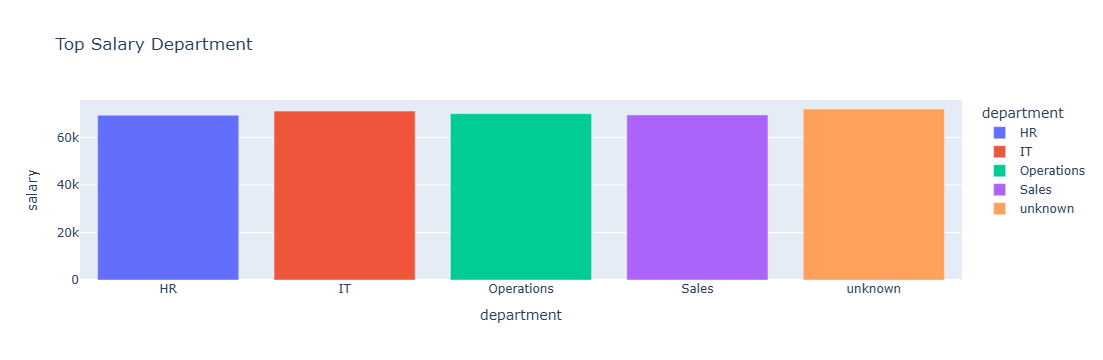

In [864]:
fig = px.bar(
    hii,
    x='department',
    y='salary',
    title='Top Salary Department',
    color='department'
)
fig.show()

In [865]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,EMP 1,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20,2023-05-10,50000
1,EMP 2,Operations,29,Male,10.0,10.0,60.0,44647.0,5000.0,35.0,No,10.0,1.0,4.0,High,Yes,2,2020-03-04,2023-06-01,10000
2,EMP 3,Sales,55,Male,10.0,20.0,80.0,85180.0,0.0,50.0,No,10.0,5.0,2.0,Medium,Yes,2,2022-10-18,2023-03-11,50000
3,EMP 4,Operations,47,Male,5.0,10.0,80.0,50933.0,0.0,50.0,No,3.0,1.0,4.0,Medium,unknown,3,2020-12-08,2023-07-26,50000
4,EMP 5,IT,29,Male,3.0,20.0,60.0,85614.0,0.0,40.0,No,10.0,2.0,1.0,Medium,Yes,3,2021-04-29,2023-09-22,10000


# Training hours vs Performance score

In [866]:
training  = df.groupby('training_hours')['performance_score'].mean().reset_index()

In [867]:
training

,training_hours,performance_score
0,5.0,69.819005
1,10.0,70.101580
2,20.0,69.380734
3,40.0,70.235955
4,60.0,70.422535


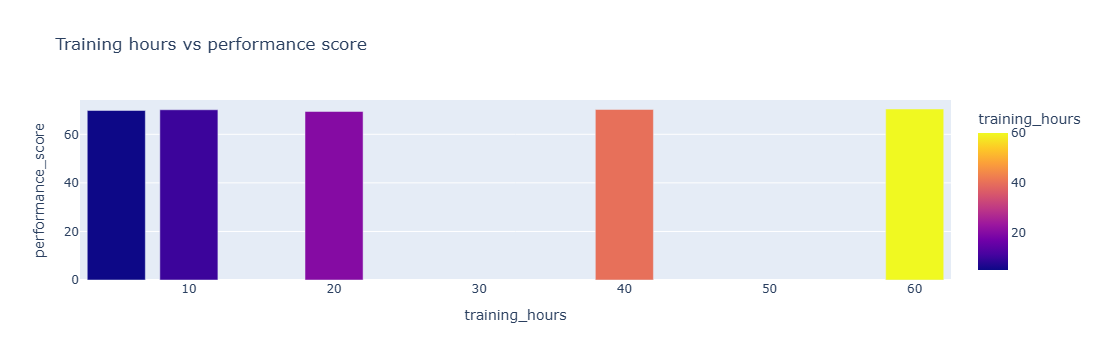

In [869]:
fig = px.bar(
    training,
    x='training_hours',
    y='performance_score',
    title='Training hours vs performance score',
    color='training_hours'
)
fig.show()

In [870]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,EMP 1,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20,2023-05-10,50000
1,EMP 2,Operations,29,Male,10.0,10.0,60.0,44647.0,5000.0,35.0,No,10.0,1.0,4.0,High,Yes,2,2020-03-04,2023-06-01,10000
2,EMP 3,Sales,55,Male,10.0,20.0,80.0,85180.0,0.0,50.0,No,10.0,5.0,2.0,Medium,Yes,2,2022-10-18,2023-03-11,50000
3,EMP 4,Operations,47,Male,5.0,10.0,80.0,50933.0,0.0,50.0,No,3.0,1.0,4.0,Medium,unknown,3,2020-12-08,2023-07-26,50000
4,EMP 5,IT,29,Male,3.0,20.0,60.0,85614.0,0.0,40.0,No,10.0,2.0,1.0,Medium,Yes,3,2021-04-29,2023-09-22,10000


# Work hours vs promotion growth

In [871]:
works = df.groupby('promotion_received')['work_hours_weekly'].mean().reset_index()

In [872]:
works

,promotion_received,work_hours_weekly
0,No,44.170944
1,Yes,43.979592
2,unknown,44.682540


In [873]:
df[df['promotion_received'] != 'unknown']

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,EMP 1,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20,2023-05-10,50000
1,EMP 2,Operations,29,Male,10.0,10.0,60.0,44647.0,5000.0,35.0,No,10.0,1.0,4.0,High,Yes,2,2020-03-04,2023-06-01,10000
2,EMP 3,Sales,55,Male,10.0,20.0,80.0,85180.0,0.0,50.0,No,10.0,5.0,2.0,Medium,Yes,2,2022-10-18,2023-03-11,50000
3,EMP 4,Operations,47,Male,5.0,10.0,80.0,50933.0,0.0,50.0,No,3.0,1.0,4.0,Medium,unknown,3,2020-12-08,2023-07-26,50000
4,EMP 5,IT,29,Male,3.0,20.0,60.0,85614.0,0.0,40.0,No,10.0,2.0,1.0,Medium,Yes,3,2021-04-29,2023-09-22,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265,EMP 5266,IT,54,Female,7.0,60.0,90.0,55344.0,0.0,40.0,No,10.0,4.0,4.0,Medium,Yes,1,2015-02-13,2023-06-23,50000
5266,EMP 5267,Sales,25,Male,5.0,10.0,50.0,96017.0,5000.0,35.0,Yes,5.0,2.0,3.0,High,Yes,5,2023-01-27,2023-05-02,50000
5267,EMP 5268,Sales,59,Female,7.0,10.0,90.0,51941.0,10000.0,50.0,No,5.0,5.0,4.0,High,No,4,2020-04-01,2023-12-03,20000
5268,EMP 5269,Sales,33,Male,5.0,10.0,60.0,101765.0,10000.0,45.0,Yes,3.0,4.0,3.0,Medium,No,3,2022-06-08,2023-06-20,50000


In [874]:
works = df.groupby('promotion_received')['work_hours_weekly'].mean().reset_index()

In [875]:
works

,promotion_received,work_hours_weekly
0,No,44.170944
1,Yes,43.979592
2,unknown,44.682540


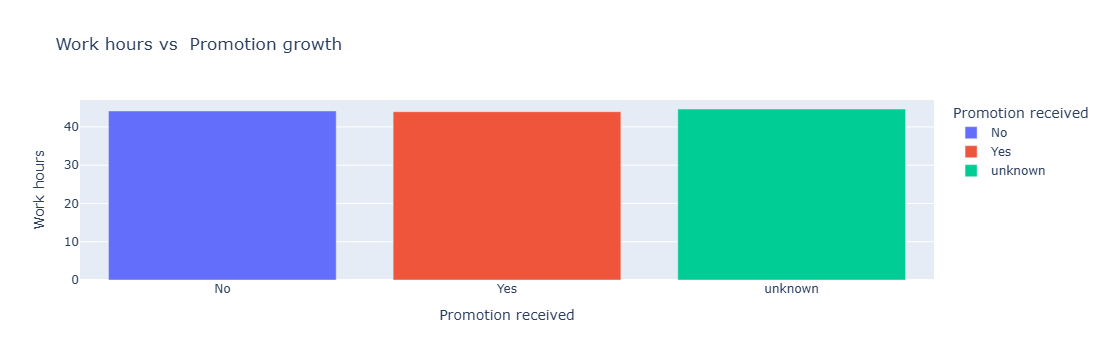

In [876]:
fig = px.bar(
    works,
    x='promotion_received',
    y='work_hours_weekly',
    title='Work hours vs  Promotion growth',
    labels={'promotion_received':'Promotion received','work_hours_weekly':'Work hours'},
    color='promotion_received'
)
fig.show()

In [877]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,EMP 1,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20,2023-05-10,50000
1,EMP 2,Operations,29,Male,10.0,10.0,60.0,44647.0,5000.0,35.0,No,10.0,1.0,4.0,High,Yes,2,2020-03-04,2023-06-01,10000
2,EMP 3,Sales,55,Male,10.0,20.0,80.0,85180.0,0.0,50.0,No,10.0,5.0,2.0,Medium,Yes,2,2022-10-18,2023-03-11,50000
3,EMP 4,Operations,47,Male,5.0,10.0,80.0,50933.0,0.0,50.0,No,3.0,1.0,4.0,Medium,unknown,3,2020-12-08,2023-07-26,50000
4,EMP 5,IT,29,Male,3.0,20.0,60.0,85614.0,0.0,40.0,No,10.0,2.0,1.0,Medium,Yes,3,2021-04-29,2023-09-22,10000


# Experience_years vs  Bonus 

In [878]:
experience = df.groupby('experience_years')['bonus'].mean().reset_index()

In [879]:
experience

,experience_years,bonus
0,1.0,3547.945205
1,3.0,3512.851897
2,5.0,3740.912095
3,7.0,3712.871287
4,10.0,3732.534930


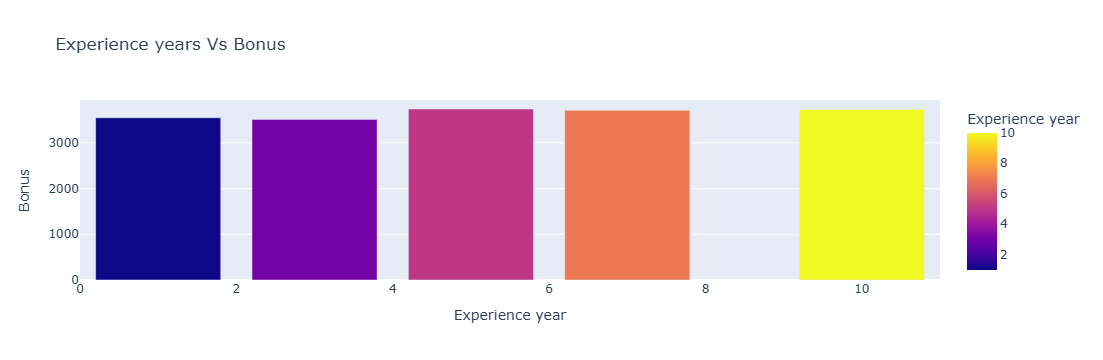

In [880]:
fig = px.bar(
    experience,
    x='experience_years',
    y='bonus',
    title='Experience years Vs Bonus',
    labels={'experience_years':'Experience year','bonus':'Bonus'},
    color='experience_years'
)
fig.show()

In [881]:
df.head()

,employee_id,department,age,gender,experience_years,training_hours,performance_score,salary,bonus,work_hours_weekly,promotion_received,team_size,manager_rating,project_count,attrition_risk,remote_work,satisfaction_level,joining_date,last_review_date,revenue_contribution
0,EMP 1,IT,54,Female,1.0,10.0,80.0,41695.0,0.0,40.0,Yes,3.0,3.0,4.0,Low,No,5,2021-05-20,2023-05-10,50000
1,EMP 2,Operations,29,Male,10.0,10.0,60.0,44647.0,5000.0,35.0,No,10.0,1.0,4.0,High,Yes,2,2020-03-04,2023-06-01,10000
2,EMP 3,Sales,55,Male,10.0,20.0,80.0,85180.0,0.0,50.0,No,10.0,5.0,2.0,Medium,Yes,2,2022-10-18,2023-03-11,50000
3,EMP 4,Operations,47,Male,5.0,10.0,80.0,50933.0,0.0,50.0,No,3.0,1.0,4.0,Medium,unknown,3,2020-12-08,2023-07-26,50000
4,EMP 5,IT,29,Male,3.0,20.0,60.0,85614.0,0.0,40.0,No,10.0,2.0,1.0,Medium,Yes,3,2021-04-29,2023-09-22,10000


# Which department has the highest percentage of remote work

In [885]:
df['remote_work']  = df['remote_work'].replace('unknown',pd.NA)

In [886]:
df = df.dropna(subset=['remote_work'])

In [887]:
df['remote_work'].unique()

array(['No', 'Yes'], dtype=object)

In [889]:
mapss = {
    'Yes' : 1,
    'No' : 0,
}
df['remote_work'] = df['remote_work'].map(mapss)

In [891]:
hiii =  df.groupby('department')['remote_work'].mean().reset_index()

In [892]:
hiii

,department,remote_work
0,HR,0.503854
1,IT,0.494212
2,Operations,0.503846
3,Sales,0.504021
4,unknown,0.473684


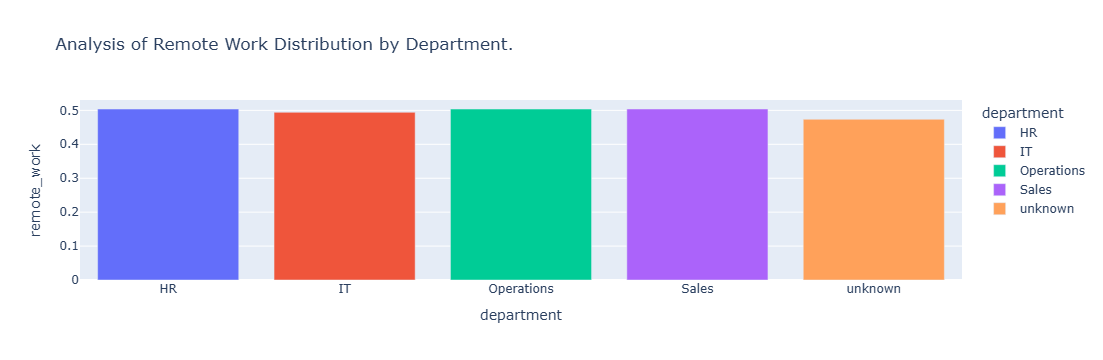

In [894]:
fig = px.bar(
    hiii,
    x='department',
    y='remote_work',
    title='Analysis of Remote Work Distribution by Department.',
    color='department'
)
fig.show()